<a href="https://colab.research.google.com/github/rylan-berry/DeepLearningIndependentStudy/blob/main/RylanBerryCh8ProblemSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question Sheet: Additional Material from Chapter 8

### Instructions:
Answer the following questions based on your understanding of Chapter 8, 'Optimization for Training Deep Models', from 'Deep Learning' by Ian Goodfellow.

---

### Questions:

1.  **Challenges in Optimization for Deep Learning:**
    What are some of the primary challenges encountered when optimizing deep learning models compared to traditional optimization problems? (e.g., local minima, saddle points, vanishing/exploding gradients)
    
    *Optimization will go to where the slope is zero, while this is typically at local minimums, it can also be ecountered at local maximums and saddle points, which would make the model stuck at those points, and prevent the model from finding a minimum. Traditional optimization problems have these points less frequent, and you would be able to tell that these aren't mins, but in deep learning we don't get to see the graph, and there points can appear anywhere.*

2.  **Second-Order Optimization Methods:**
    Briefly explain the concept of second-order optimization methods (e.g., Newton's method) and why they are generally not practical for deep learning. What approximations are sometimes used instead?

    *Second-Order Optimization methods aim to find a minimum in a single jump, but, this is hard since it would also jump to points that aren't mins (the ones mentioned in prev), it's computationally expensive, and only works when the Hessian matrix is positive.*

3.  **Adaptive Learning Rate Methods - Key Idea:**
    What is the fundamental idea behind adaptive learning rate methods like AdaGrad, RMSProp, and Adam? How do they differ from simple SGD with a fixed learning rate?

    *Adaptive learning rate methods aim to adjust the learning rate as training goes on.*

4.  **Bias Correction in Adam:**
    Explain the purpose of bias correction in the Adam optimization algorithm. Why is it necessary, especially in the initial steps of training?

    *Corrects for the initialization around the origin.*

5.  **Choosing an Optimizer:**
    Given the various optimizers discussed (SGD, SGD with Momentum, AdaGrad, RMSProp, Adam), what factors would you consider when choosing an appropriate optimizer for a new deep learning project? Are there situations where a simpler optimizer might be preferred over a more complex one?

    *I would say it's entirely dependent on the complexity of the situtation, in order of increasing complexity, I'd use SGD, SGD w/ mometun, AdaGrad, RMSProp, then Adam. While just using the most complex method may work all the time, it would increase the compute needed for what may be marginal improvements. And, some of the more complex optimizers take longer to conver, furthering compute demand.*


# Task
Implement and compare the performance of various optimization algorithms including Stochastic Gradient Descent (SGD), SGD with Momentum, AdaGrad, RMSProp, and Adam on a simple, differentiable objective function. The task involves implementing each algorithm, tracking their parameter updates and loss values, visualizing their convergence paths, and summarizing the observed differences in performance, convergence speed, stability, and the impact of hyperparameters.

## Setup Environment and Define Objective Function

### Subtask:
Import necessary libraries and define a simple, differentiable objective function along with its gradient.


In [147]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    """A simple quadratic objective function f(x) = x^2."""
    return x**2

def gradient_function(x):
    """The gradient of the objective function df/dx = 2x."""
    return 2 * x

print("Libraries imported and objective function and its gradient defined.")

Libraries imported and objective function and its gradient defined.


## Implement Stochastic Gradient Descent (SGD)

### Subtask:
Write a Python function to implement the basic Stochastic Gradient Descent algorithm.


In [148]:
def sgd(initial_x, learning_rate,fin_l_rate, n_iterations,fin_iters, gradient_func, objective_func):
    """Implements the Stochastic Gradient Descent (SGD) algorithm."""
    # TODO: Implement SGD [DONE]
    #raise NotImplementedError("SGD implementation is missing.")
    x = initial_x
    x_his = [x]
    loss_his = []
    for i in range(n_iterations):
      loss = objective_func(x)
      alpha = i/fin_iters
      if(alpha < 1):
        l_rate = learning_rate*(1-alpha) + alpha*fin_l_rate
      else:
        l_rate = fin_l_rate
      x -= l_rate*(1-alpha)*gradient_func(x)
      x_his.append(x); loss_his.append(loss)

    return x_his, loss_his

print("SGD function defined.")

SGD function defined.


## Implement SGD with Momentum

### Subtask:
Extend the basic SGD implementation to include the momentum term.


In [149]:
def sgd_momentum(initial_x, learning_rate, n_iterations, gradient_func, objective_func, momentum_beta):
    """Implements the Stochastic Gradient Descent with Momentum algorithm."""
    # TODO: Implement SGD with Momentum [DONE]
    #raise NotImplementedError("SGD with Momentum implementation is missing.")
    v = 0.0 #standard to initially be zero
    x = initial_x
    x_his = [x]
    loss_his = []
    for i in range(n_iterations):
      loss = objective_func(x)
      v = momentum_beta*v - learning_rate*gradient_func(x)
      x += v
      x_his.append(x); loss_his.append(loss)

    return x_his, loss_his

print("SGD with Momentum function defined.")

SGD with Momentum function defined.


## Implement AdaGrad

### Subtask:
Implement the AdaGrad optimization algorithm.


In [150]:
def adagrad(initial_x, learning_rate, n_iterations, gradient_func, objective_func, gamma=0.0000001):
    """Implements the AdaGrad optimization algorithm."""
    # TODO: Implement AdaGrad [DONE]
    #raise NotImplementedError("AdaGrad implementation is missing.")
    x = initial_x
    x_his = [x]
    loss_his = []
    r = 0.0
    for i in range(n_iterations):
      loss = objective_func(x)
      g = gradient_func(x)
      r += g**2 #element wise if it were a matrix
      x -= learning_rate/(gamma + r**(1/2)) *g #also element wise if matrix
      x_his.append(x); loss_his.append(loss)

    return x_his, loss_his

print("AdaGrad function defined.")

AdaGrad function defined.


## Implement RMSProp

### Subtask:
Implement the RMSProp optimization algorithm, which uses an exponentially decaying average of squared gradients.


In [151]:
def rmsprop(initial_x, learning_rate, n_iterations, gradient_func, objective_func, decay_rate, gamma=0.000001):
    """Implements the RMSProp optimization algorithm."""
    # TODO: Implement RMSProp [DONE]
    #raise NotImplementedError("RMSProp implementation is missing.")
    x = initial_x
    x_his = [x]
    loss_his = []
    r = 0.0
    for i in range(n_iterations):
      loss = objective_func(x)
      g = gradient_func(x)
      r = decay_rate*r + (1-decay_rate)*g**2 #element wise if it were a matrix
      x -= learning_rate/(gamma + r**(1/2)) *g #also element wise if matrix
      x_his.append(x); loss_his.append(loss)

    return x_his, loss_his

print("RMSProp function defined.")

RMSProp function defined.


## Implement Adam

### Subtask:
Implement the Adam optimization algorithm.

In [152]:
def adam(initial_x, learning_rate, n_iterations, gradient_func, objective_func, beta1, beta2, gamma = 0.000001):
    """Implements the Adam optimization algorithm."""
    # TODO: Implement Adam [DONE]
    #raise NotImplementedError("Adam implementation is missing.")

    x = initial_x
    x_his = [x]
    loss_his = []
    r = 0.0
    s = 0.0
    for i in range(n_iterations):
      t = i+1
      loss = objective_func(x)
      g = gradient_func(x)

      s = beta1*r + (1-beta1)*g #element wise
      r = beta2*r + (1-beta2)*g**2 #element wise if it were a matrix

      #Bias correction
      s_hat = s/(1-beta1**t)
      r_hat = r/(1-beta2**t)

      x -= learning_rate*s_hat/(gamma + r_hat**(1/2)) *g #also element wise if matrix
      x_his.append(x); loss_his.append(loss)
    return x_his, loss_his
print("Adam function defined.")

Adam function defined.


## Prepare for Evaluation and Comparison

### Subtask:
Set up common parameters, run all implemented optimization algorithms (SGD, SGD with Momentum, AdaGrad, RMSProp, and Adam), and collect their `x_history` and `loss_history` results.

In [153]:
initial_x = 10.0
n_iterations = 100

# Common learning rate for SGD, SGD with Momentum, AdaGrad, RMSProp, and Adam
common_learning_rate = 0.1

# Specific parameters for each optimizer
momentum_beta = 0.9
rmsprop_decay_rate = 0.9
adam_beta1 = 0.9
adam_beta2 = 0.999

# Run SGD
sgd_x_history, sgd_loss_history = sgd(initial_x, common_learning_rate, 0, n_iterations, n_iterations,gradient_function, objective_function)

# Run SGD with Momentum
sgd_momentum_x_history, sgd_momentum_loss_history = sgd_momentum(initial_x, common_learning_rate, n_iterations, gradient_function, objective_function, momentum_beta)

# Run AdaGrad
adagrad_x_history, adagrad_loss_history = adagrad(initial_x, common_learning_rate, n_iterations, gradient_function, objective_function)

# Run RMSProp
rmsprop_x_history, rmsprop_loss_history = rmsprop(initial_x, common_learning_rate, n_iterations, gradient_function, objective_function, rmsprop_decay_rate)

# Run Adam
adam_x_history, adam_loss_history = adam(initial_x, common_learning_rate, n_iterations, gradient_function, objective_function, adam_beta1, adam_beta2)

print("Optimization algorithms executed and results collected.")


Optimization algorithms executed and results collected.


## Visualize Optimization Paths

### Subtask:
Generate plots to visualize the convergence of each optimizer, including the objective function value over iterations and the parameter trajectory.


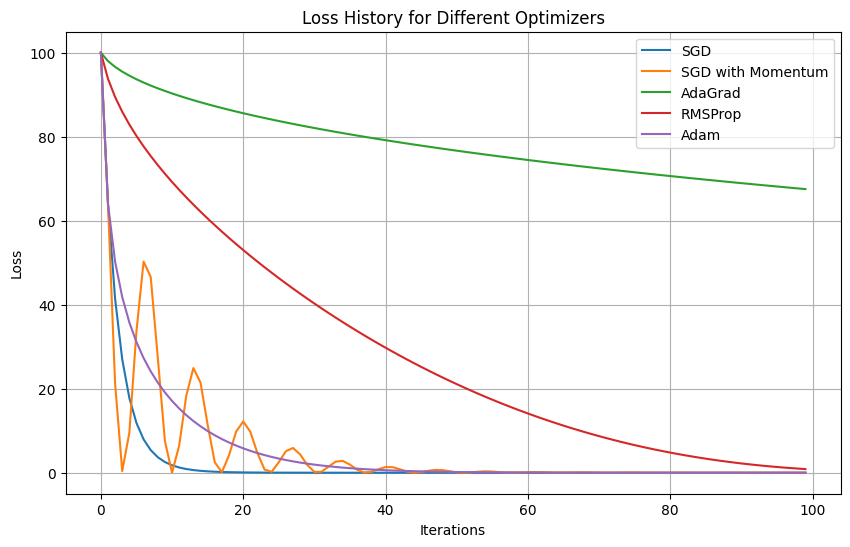

Loss history plot generated.


In [154]:
plt.figure(figsize=(10, 6))
plt.plot(sgd_loss_history, label='SGD')
plt.plot(sgd_momentum_loss_history, label='SGD with Momentum')
plt.plot(adagrad_loss_history, label='AdaGrad')
plt.plot(rmsprop_loss_history, label='RMSProp')
plt.plot(adam_loss_history, label='Adam')
plt.title('Loss History for Different Optimizers')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Loss history plot generated.")

**Reasoning**:
I need to generate a second plot to visualize the parameter `x` trajectory for all implemented optimizers (SGD, SGD with Momentum, AdaGrad, RMSProp, and Adam) against the number of iterations on a single graph, as per the subtask instructions.



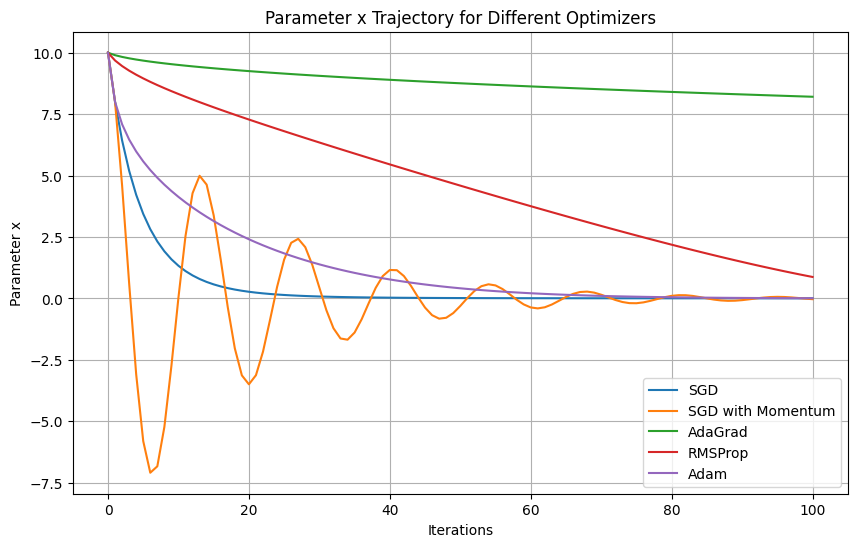

Parameter x trajectory plot generated.


In [155]:
plt.figure(figsize=(10, 6))
plt.plot(sgd_x_history, label='SGD')
plt.plot(sgd_momentum_x_history, label='SGD with Momentum')
plt.plot(adagrad_x_history, label='AdaGrad')
plt.plot(rmsprop_x_history, label='RMSProp')
plt.plot(adam_x_history, label='Adam')
plt.title('Parameter x Trajectory for Different Optimizers')
plt.xlabel('Iterations')
plt.ylabel('Parameter x')
plt.legend()
plt.grid(True)
plt.show()

print("Parameter x trajectory plot generated.")

*What I noticed with each:*


*   ***SGD** converged the quickest, but it's the simplest function so is likely to have trouble in most cases like standard gradient dissent.*
*   ***SGD with Momentum** is the most interesting of all the functions, since it quickly sways back and forth like a pendulum or osselating spring, which to be fair is expected if you think of it as a ball going back and forth in a bowl.*
*   ***AdaGrad** is the least porformative function. While it's not quick, it probably does well at converging at a good minimum and serves as a decent foundation from most of subsiquent functions.*
*   ***RMSProp** doesn't preform as badly as AdaGrad but still isn't the best, it probably finds a good minimum after more time.*
*   ***Adam** is arguably the best of both worlds, it converges rather quickly (not as fast as SDG but probably equal to SGD with momentum) and it includes all of the optimization improvements from AdaGrad and RMSProp, making it the most versatile optimizer.


*I also want to try this with a different function that I've gone ahead and set up.*

In [156]:
def objective_function_2(x):
    """A complex quadratic objective function f(x) =1/2*x^6 + 1/2*x^5 - 2x^4 - 2x^3 + 8."""
    return 1/2*x**6 + 1/2*x**5 - 2*x**4 - 2*x**3 + 8

def gradient_function_2(x):
    """The gradient of the objective function df/dx = 3x^5 + 5/2*x^4 - 8x^3 - 6x^2."""
    return 3*x**5 + 5/2*x**4 - 8*x**3 - 6*x**2

In [157]:
initial_x = -2.6
common_learning_rate = 1e-3
n_iterations = 200
sgd_x_history, sgd_loss_history = sgd(initial_x, common_learning_rate, 0, n_iterations, n_iterations,gradient_function_2, objective_function_2)
sgd_momentum_x_history, sgd_momentum_loss_history = sgd_momentum(initial_x, common_learning_rate, n_iterations, gradient_function_2, objective_function_2, momentum_beta)
adagrad_x_history, adagrad_loss_history = adagrad(initial_x, common_learning_rate, n_iterations, gradient_function_2, objective_function_2)
rmsprop_x_history, rmsprop_loss_history = rmsprop(initial_x, common_learning_rate, n_iterations, gradient_function_2, objective_function_2, rmsprop_decay_rate)
adam_x_history, adam_loss_history = adam(initial_x, common_learning_rate, n_iterations, gradient_function_2, objective_function_2, adam_beta1, adam_beta2)

print("Optimization algorithms executed and results collected.")

Optimization algorithms executed and results collected.


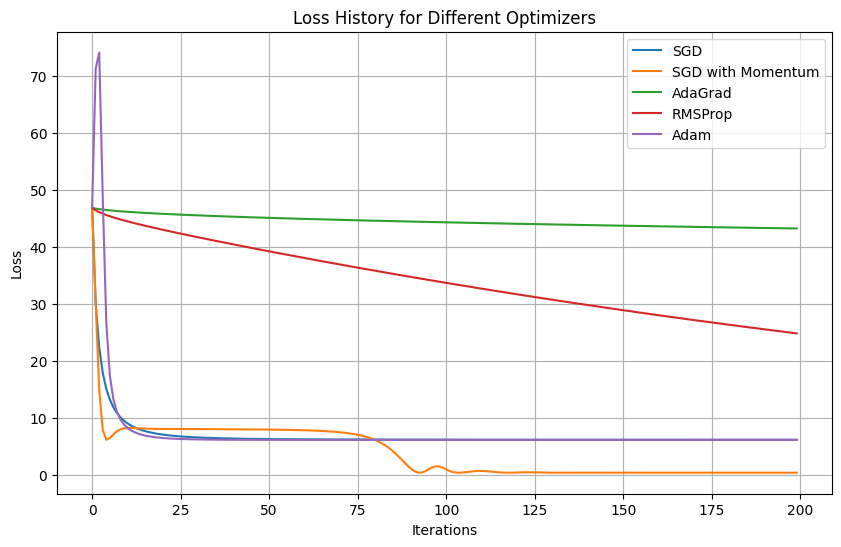

Loss history plot generated.


In [158]:
plt.figure(figsize=(10, 6))
plt.plot(sgd_loss_history, label='SGD')
plt.plot(sgd_momentum_loss_history, label='SGD with Momentum')
plt.plot(adagrad_loss_history, label='AdaGrad')
plt.plot(rmsprop_loss_history, label='RMSProp')
plt.plot(adam_loss_history, label='Adam')
plt.title('Loss History for Different Optimizers')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Loss history plot generated.")

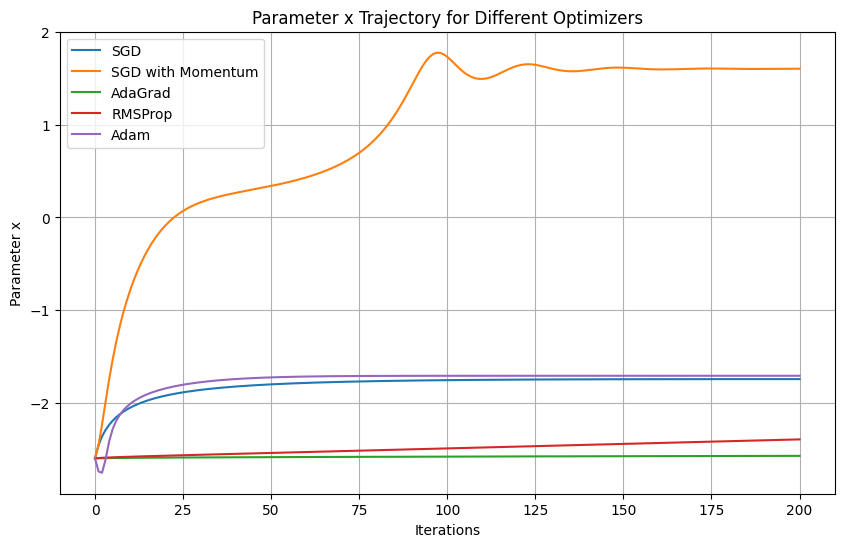

Parameter x trajectory plot generated.


In [159]:
plt.figure(figsize=(10, 6))
plt.plot(sgd_x_history, label='SGD')
plt.plot(sgd_momentum_x_history, label='SGD with Momentum')
plt.plot(adagrad_x_history, label='AdaGrad')
plt.plot(rmsprop_x_history, label='RMSProp')
plt.plot(adam_x_history, label='Adam')
plt.title('Parameter x Trajectory for Different Optimizers')
plt.xlabel('Iterations')
plt.ylabel('Parameter x')
plt.legend()
plt.grid(True)
plt.show()

print("Parameter x trajectory plot generated.")

In [160]:
initial_x = -0.5
common_learning_rate = 1e-3
n_iterations = 200
sgd_x_history, sgd_loss_history = sgd(initial_x, common_learning_rate, 0, n_iterations, n_iterations,gradient_function_2, objective_function_2)
sgd_momentum_x_history, sgd_momentum_loss_history = sgd_momentum(initial_x, common_learning_rate, n_iterations, gradient_function_2, objective_function_2, momentum_beta)
adagrad_x_history, adagrad_loss_history = adagrad(initial_x, common_learning_rate, n_iterations, gradient_function_2, objective_function_2)
rmsprop_x_history, rmsprop_loss_history = rmsprop(initial_x, common_learning_rate, n_iterations, gradient_function_2, objective_function_2, rmsprop_decay_rate)
adam_x_history, adam_loss_history = adam(initial_x, common_learning_rate, n_iterations, gradient_function_2, objective_function_2, adam_beta1, adam_beta2)

print("Optimization algorithms executed and results collected.")

Optimization algorithms executed and results collected.


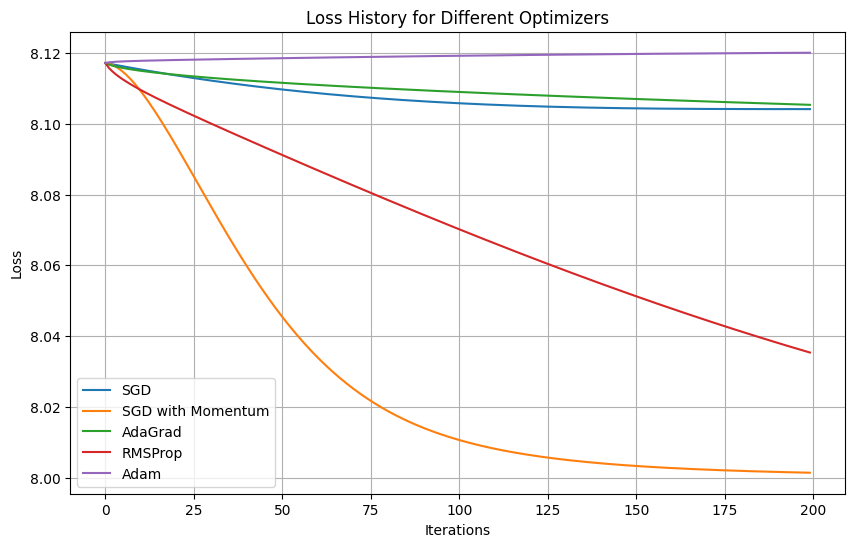

Loss history plot generated.


In [161]:
plt.figure(figsize=(10, 6))
plt.plot(sgd_loss_history, label='SGD')
plt.plot(sgd_momentum_loss_history, label='SGD with Momentum')
plt.plot(adagrad_loss_history, label='AdaGrad')
plt.plot(rmsprop_loss_history, label='RMSProp')
plt.plot(adam_loss_history, label='Adam')
plt.title('Loss History for Different Optimizers')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Loss history plot generated.")

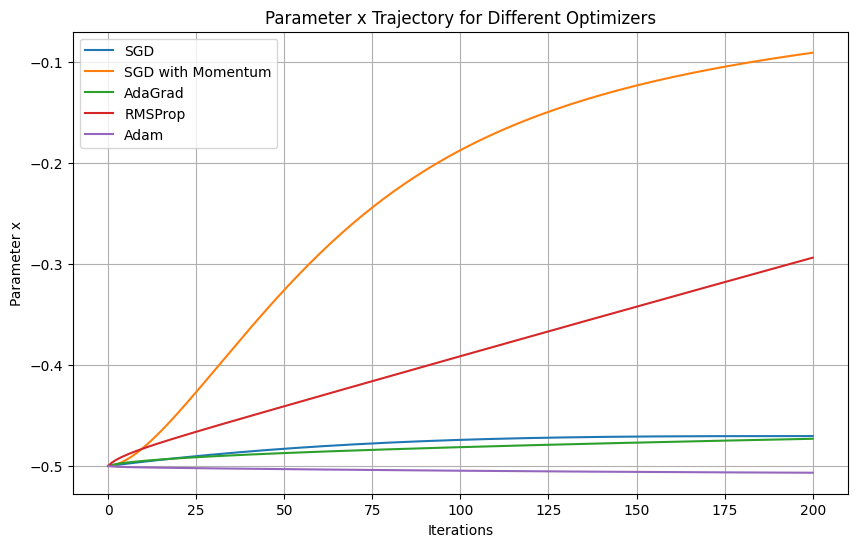

Parameter x trajectory plot generated.


In [162]:
plt.figure(figsize=(10, 6))
plt.plot(sgd_x_history, label='SGD')
plt.plot(sgd_momentum_x_history, label='SGD with Momentum')
plt.plot(adagrad_x_history, label='AdaGrad')
plt.plot(rmsprop_x_history, label='RMSProp')
plt.plot(adam_x_history, label='Adam')
plt.title('Parameter x Trajectory for Different Optimizers')
plt.xlabel('Iterations')
plt.ylabel('Parameter x')
plt.legend()
plt.grid(True)
plt.show()

print("Parameter x trajectory plot generated.")

*At this point I've been messing with the parameters and I've been getting interesting results. SGD w/ momentum seems to be more likely to find the true min, while SGD and Adam find a local min. AdaGrad and RMS prop go too slowly to say too much meaningfully about them. And in the current version, Adam found a problematic local maxima that's got it stuck.*

## Answer Key (according to Gemini): Additional Material from Chapter 8

### Instructions:
Use this answer key to check your understanding after attempting the questions on the Question Sheet.

---

### Answers:

1.  **Challenges in Optimization for Deep Learning:**
    *   **Non-convexity:** Deep learning objective functions are highly non-convex, meaning they have many local minima, maxima, and saddle points. This makes finding the global minimum very difficult.
    *   **Saddle Points:** In high-dimensional spaces, saddle points are more common than local minima. Optimizers can get stuck at saddle points, where the gradient is zero, but it's not a minimum.
    *   **Vanishing/Exploding Gradients:** Gradients can become extremely small (vanishing) or extremely large (exploding) as they propagate through many layers, especially in deep networks. This hinders effective learning.
    *   **Computational Cost:** Deep models have millions or billions of parameters, making calculations for second-order methods (like Hessian matrices) computationally intractable.
    *   **Ill-Conditioning:** The Hessian matrix can be ill-conditioned, meaning some directions have very small curvature while others have very large curvature, making it hard to choose an appropriate learning rate.

2.  **Second-Order Optimization Methods:**
    Second-order optimization methods, like Newton's method, use the second derivative (Hessian matrix) to incorporate information about the curvature of the objective function. They aim to jump directly to the minimum by finding a step that not only goes downhill but also accounts for how steep and curved the landscape is. They are generally not practical for deep learning because:
    *   **Computational Cost:** Calculating and inverting the Hessian matrix (or even storing it) for deep models with many parameters is prohibitively expensive ($O(D^2)$ for calculation, where D is the number of parameters).
    *   **Memory Cost:** The Hessian matrix can be enormous, requiring too much memory.
    *   **Non-convexity:** In non-convex landscapes, the Hessian might not be positive definite, making Newton's method prone to finding saddle points or local maxima.
    *   **Approximations:** Instead, quasi-Newton methods (e.g., BFGS, L-BFGS) approximate the Hessian or its inverse, reducing computational and memory costs, but are still often too complex for typical deep learning scenarios.

3.  **Adaptive Learning Rate Methods - Key Idea:**
    The fundamental idea behind adaptive learning rate methods (AdaGrad, RMSProp, Adam) is to adjust the learning rate for each parameter individually based on the historical gradients. They assign larger learning rates to parameters with small historical gradients and smaller learning rates to parameters with large historical gradients.
    *   **Fixed Learning Rate (SGD):** SGD uses a single, global learning rate for all parameters throughout training. If this rate is too high, it might overshoot; too low, it converges slowly. It doesn't adapt to the landscape for individual parameters.
    *   **Adaptive Methods:** These methods maintain a per-parameter learning rate that scales inversely with the magnitudes of past gradients (typically squared gradients). This allows them to handle sparse gradients, different scales of features, and varying curvature across different dimensions more effectively.

4.  **Bias Correction in Adam:**
    Bias correction in Adam is applied to the first moment estimate ($m$) and the second moment estimate ($v$) at the beginning of training. In Adam, $m$ and $v$ are initialized to zero and are exponentially weighted moving averages of the gradients and squared gradients, respectively. In the early iterations, these moving averages are biased towards zero because of their initialization.
    *   **Purpose:** Bias correction ensures that the estimates of the first and second moments are unbiased, especially during the initial steps. Without bias correction, the learning rate updates would be incorrectly scaled (too small) at the beginning, potentially slowing down initial progress or making the optimizer less effective.
    *   **Necessity:** As $t$ (iteration number) increases, the bias ($1 - \beta_1^t$) and ($1 - \beta_2^t$) terms approach 1, and the bias-corrected estimates become approximately equal to the uncorrected estimates. Therefore, bias correction is most crucial in the early stages when the moving averages are heavily influenced by their zero initialization.

5.  **Choosing an Optimizer:**
    Factors to consider when choosing an optimizer:
    *   **Problem Type/Dataset:** For very sparse datasets, adaptive methods like AdaGrad or Adam are often beneficial due to their per-parameter learning rate adjustments.
    *   **Model Architecture:** Deeper or more complex models often benefit from adaptive optimizers that can navigate complex loss landscapes more effectively.
    *   **Computational Resources:** Simpler optimizers like SGD or Momentum have lower computational overhead per iteration. Adaptive optimizers require more memory to store historical gradient information.
    *   **Hyperparameter Tuning Budget:** Adaptive optimizers (like Adam) often require less extensive hyperparameter tuning than SGD, which is highly sensitive to the learning rate.
    *   **Convergence Speed and Stability:** Adaptive methods generally offer faster convergence and more robust training across a wider range of hyperparameters.
    *   **Generalization Performance:** Sometimes, simpler optimizers with careful tuning (e.g., SGD with momentum) can lead to better generalization performance, especially on convex or near-convex problems, though this is debated in deep learning.

    **When a simpler optimizer might be preferred:**
    *   **Simpler Models/Convex Problems:** For simpler models or convex/nearly convex objective functions, SGD or SGD with Momentum can be sufficient and may even generalize better if meticulously tuned.
    *   **Resource Constraints:** If computational resources or memory are extremely limited, the overhead of adaptive methods might be undesirable.
    *   **Theoretical Guarantees:** Some theoretical results or proofs of convergence might be simpler or more robust for basic SGD under certain conditions.
    *   **Educational/Debugging Purposes:** For understanding fundamental concepts or debugging, starting with a simpler optimizer can be helpful before moving to more complex ones.
